In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils
import pickle

In [2]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [7]:

# get paths to attached zarr files of ME frames, and pkl files of meta data
zarr_files = utils.find_files(root_dir = '/root/capsule/data', endswith='zarr')
pkl_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.pkl', return_dir=False)
meta_obj = utils.load_pickle_file(pkl_files[0])

In [8]:
#load me_pca
filepath = "/root/capsule/code/tmp_me_pca_notstand_data_stand_masks.pkl"
me_pca = utils.load_pickle_file(filepath)


In [18]:
me_pca.pca_motion_energy.shape

(221610, 100)

In [28]:
me_pca._save_results()

saving results


In [ ]:
me_pca.

Figure saved at: /root/capsule/results/749315_Nose_07085a61-f303-4192-aff4-465d70189cac


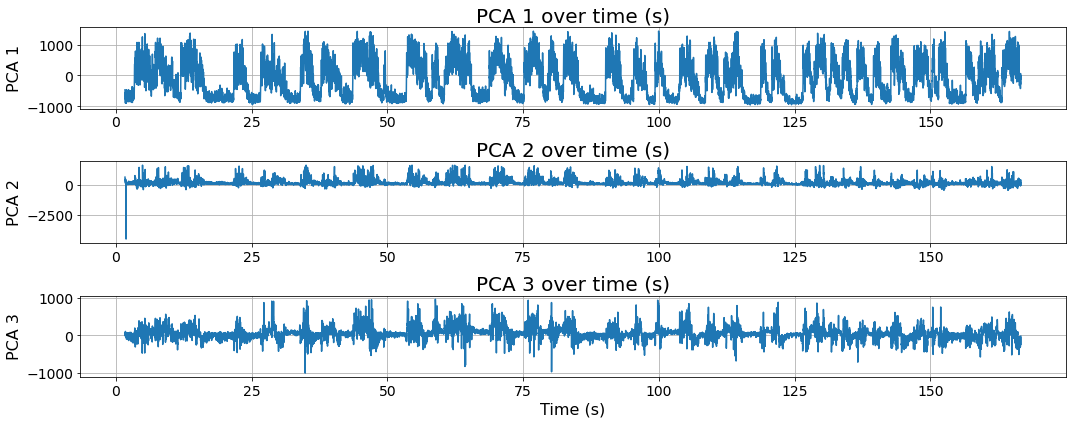

In [33]:
#me_pca._load_metadata()

fig  = me_pca._plot_pca_components_traces()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'pca_traces.npg', dpi=300, bbox_inches="tight", transparent=False)

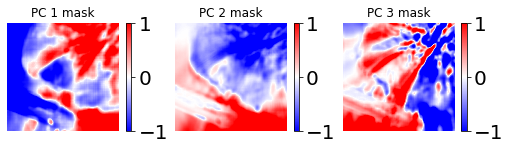

Figure saved at: /root/capsule/results/749315_Nose_07085a61-f303-4192-aff4-465d70189cac


In [36]:
fig  = me_pca._plot_spatial_masks()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 'masks.npg', dpi=200, bbox_inches="tight", transparent=False)

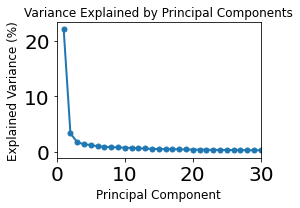

Figure saved at: /root/capsule/results/749315_Nose_07085a61-f303-4192-aff4-465d70189cac


In [39]:
#me_pca._load_metadata()

fig  = me_pca._plot_explained_variance()
utils.save_figure(fig, save_path=me_pca.top_results_path, fig_name = 've', dpi=300, bbox_inches="tight", transparent=False)

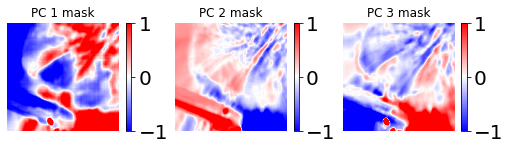

In [16]:
# standardized mask and data, cropped frame
fig = me_pca._plot_spatial_masks()

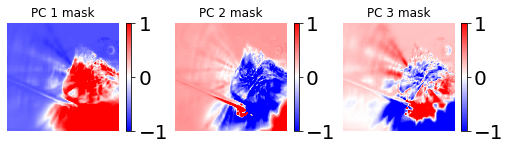

In [15]:
#standardized frames and standardized masks
#these were made for full frames but pca was computed on cropped frame
fig = me_pca._plot_spatial_masks()

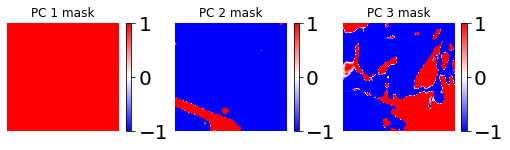

In [ ]:
#standardized frames and standardized masks
#these were made for full frames but pca was computed on cropped frame
fig = me_pca._plot_spatial_masks()

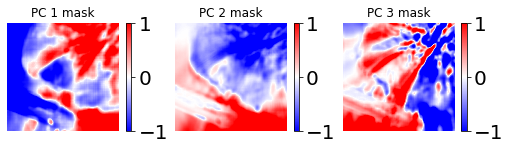

In [ ]:
# not standardized frames, standardized mask
fig = me_pca._plot_spatial_masks()

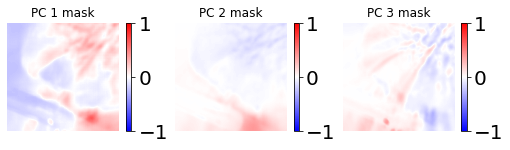

In [ ]:
# not standardized frames, standardized mask (short video)
# could be lighter also due to inclussion of noisy first frame?
fig = me_pca.plot_spatial_masks()

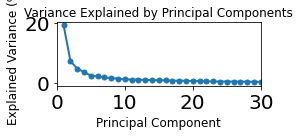

In [18]:
fig = me_pca._plot_explained_variance()

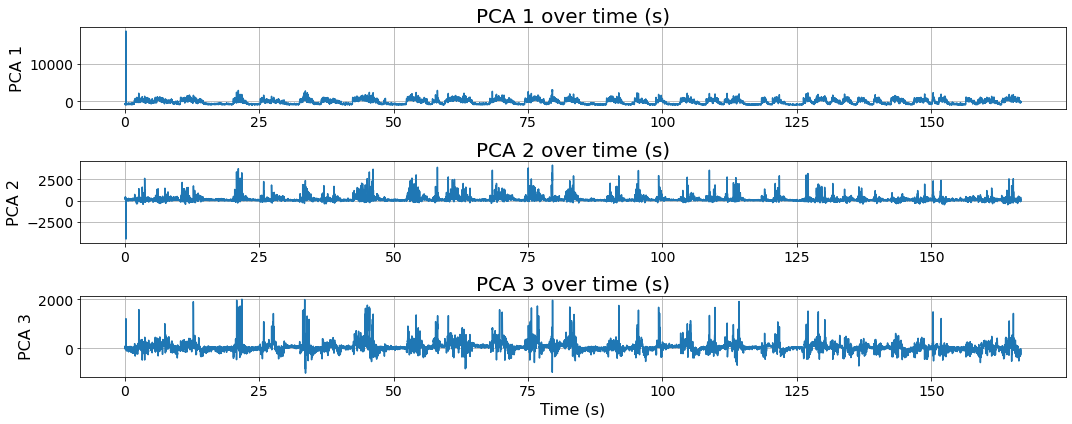

In [34]:
fig =me_pca._plot_pca_components_traces()

In [35]:
me_pca.loaded_metadata

{'video_path': '/root/capsule/data/multiplane-ophys_749315_2024-11-20_14-58-05/behavior-videos/1406189591_Nose_20241120T145749.mp4',
 'fps': 60,
 'chunk_size': 100,
 'width': 658,
 'height': 492,
 'total_frames': 221612,
 'video_info': {'Recording Report Version': '1.0',
  'Acquisition DateTime': '11/20/24 15:59:22',
  'MVR Version': '1.1.7',
  'CameraIndex': 'Camera 4',
  'CameraLabel': 'Nose',
  'CameraID': 'DEV_000F315C24C5',
  'FPS': 60.0024,
  'CameraGain': 5,
  'CustomInitialExposureTime': 4,
  'CustomInitialNumberOfFrames': 10,
  'ExposureTime': 1,
  'ImageDimensions': '658x492',
  'BinningFactors': '1x1',
  'MovieID': 'dd6f0b5e-a792-11ef-904b-ac1f6b3c2dda',
  'VideoOutputFileName': 'C:\\ProgramData\\AIBS_MPE\\mvr\\data\\.\\1406189591_Nose_20241120T145749.mp4',
  'Codec': 'h264_nvenc',
  'FrameID imprint enabled': 'false',
  'ApproximateFileSize': '903036.896 KB',
  'h264': {'CRF': '17', 'Preset': 'medium', 'HardwareAcceleration': 'cuvid'},
  'FFMPEGInputPixelFormat': 'gray',
  